In [88]:
import pandas as pd
import transbigdata as tbd

data = pd.read_csv("zlndatasets.csv")
#make sure the time column is correct
# data['stime'] = pd.to_datetime(data['stime'], format='%Y%m%d%H%M')
# data = data.sort_values(by = ['user_id','stime'])
data.head()

,user_id,stime,latitude,longitude,date
0,4,2022-11-01 17:12:49,24.826355,102.852255,20221101
1,4,2022-11-01 17:12:56,24.826355,102.852255,20221101
2,4,2022-11-01 17:13:06,24.826355,102.852255,20221101
3,4,2022-11-01 17:13:16,24.826351,102.852282,20221101
4,4,2022-11-01 17:13:26,24.826351,102.852282,20221101


In [89]:
#Obtain gridding parameters
params = tbd.area_to_params([102.851, 24.820, 102.854, 24.830])
#Identify stay and move infomation from mobile phone trajectory data
stay,move = tbd.mobile_stay_move(data,params,col = ['user_id','stime','longitude', 'latitude'])

In [90]:
stay

,user_id,stime,LONCOL,LATCOL,etime,lon,lat,duration
0,4,2022-11-01 17:12:49,0,1,2022-11-02 00:19:47,102.852255,24.826355,25618.0
11,4,2022-11-02 00:19:47,1,2,2022-11-02 10:01:43,102.854053,24.828708,34916.0
53,4,2022-11-02 10:01:43,0,1,2022-11-03 00:23:39,102.852118,24.826619,51716.0
212,4,2022-11-03 00:25:44,1,2,2022-11-03 02:13:15,102.853750,24.828507,6451.0
215,4,2022-11-03 02:15:10,0,2,2022-11-03 04:20:20,102.853391,24.829220,7510.0
...,...,...,...,...,...,...,...,...
90705,4,2022-12-02 12:10:44,0,2,2022-12-02 13:15:00,102.853315,24.829692,3856.0
90735,4,2022-12-02 13:15:00,0,1,2022-12-03 03:01:26,102.852437,24.826579,49586.0
92163,4,2022-12-03 03:02:41,0,1,2022-12-03 03:34:08,102.851808,24.826493,1887.0
92395,4,2022-12-03 03:52:35,0,1,2022-12-04 03:14:36,102.852366,24.826694,84121.0


In [91]:
move.head()

,user_id,SLONCOL,SLATCOL,stime,slon,slat,etime,elon,elat,ELONCOL,ELATCOL,duration
0,4,0,1,2022-11-02 00:19:47,102.852255,24.826355,2022-11-02 00:19:47,102.854053,24.828708,1.0,2.0,0.0
11,4,1,2,2022-11-02 10:01:43,102.854053,24.828708,2022-11-02 10:01:43,102.852118,24.826619,0.0,1.0,0.0
53,4,0,1,2022-11-03 00:23:39,102.852118,24.826619,2022-11-03 00:25:44,102.853750,24.828507,1.0,2.0,125.0
212,4,1,2,2022-11-03 02:13:15,102.853750,24.828507,2022-11-03 02:15:10,102.853391,24.829220,0.0,2.0,115.0
215,4,0,2,2022-11-03 04:20:20,102.853391,24.829220,2022-11-03 04:20:20,102.851521,24.826174,0.0,1.0,0.0


In [92]:
#Identify home location
home = tbd.mobile_identify_home(stay, col=['user_id','stime', 'etime','LONCOL', 'LATCOL','lon','lat'], start_hour=8, end_hour=20 )
home.head()

,user_id,LONCOL,LATCOL,lon,lat
4,4,0,1,102.849935,24.82649


In [94]:
#Identify work location
work = tbd.mobile_identify_work(stay, col=['user_id', 'stime', 'etime', 'LONCOL', 'LATCOL','lon','lat'], minhour=3, start_hour=8, end_hour=20,workdaystart=0, workdayend=4)
# work = tbd.mobile_identify_work(stay, col=['user_id', 'stime', 'etime', 'LONCOL', 'LATCOL','lon','lat'])
work.head()

,user_id,LONCOL,LATCOL,lon,lat


In [95]:
# If you want to filter out the users with work place location from home location 
home['flag'] = 1
work = pd.merge(work,home,how='left')
home = home.drop(['flag'],axis = 1)
work = work[work['flag'].isnull()].drop(['flag'],axis = 1)

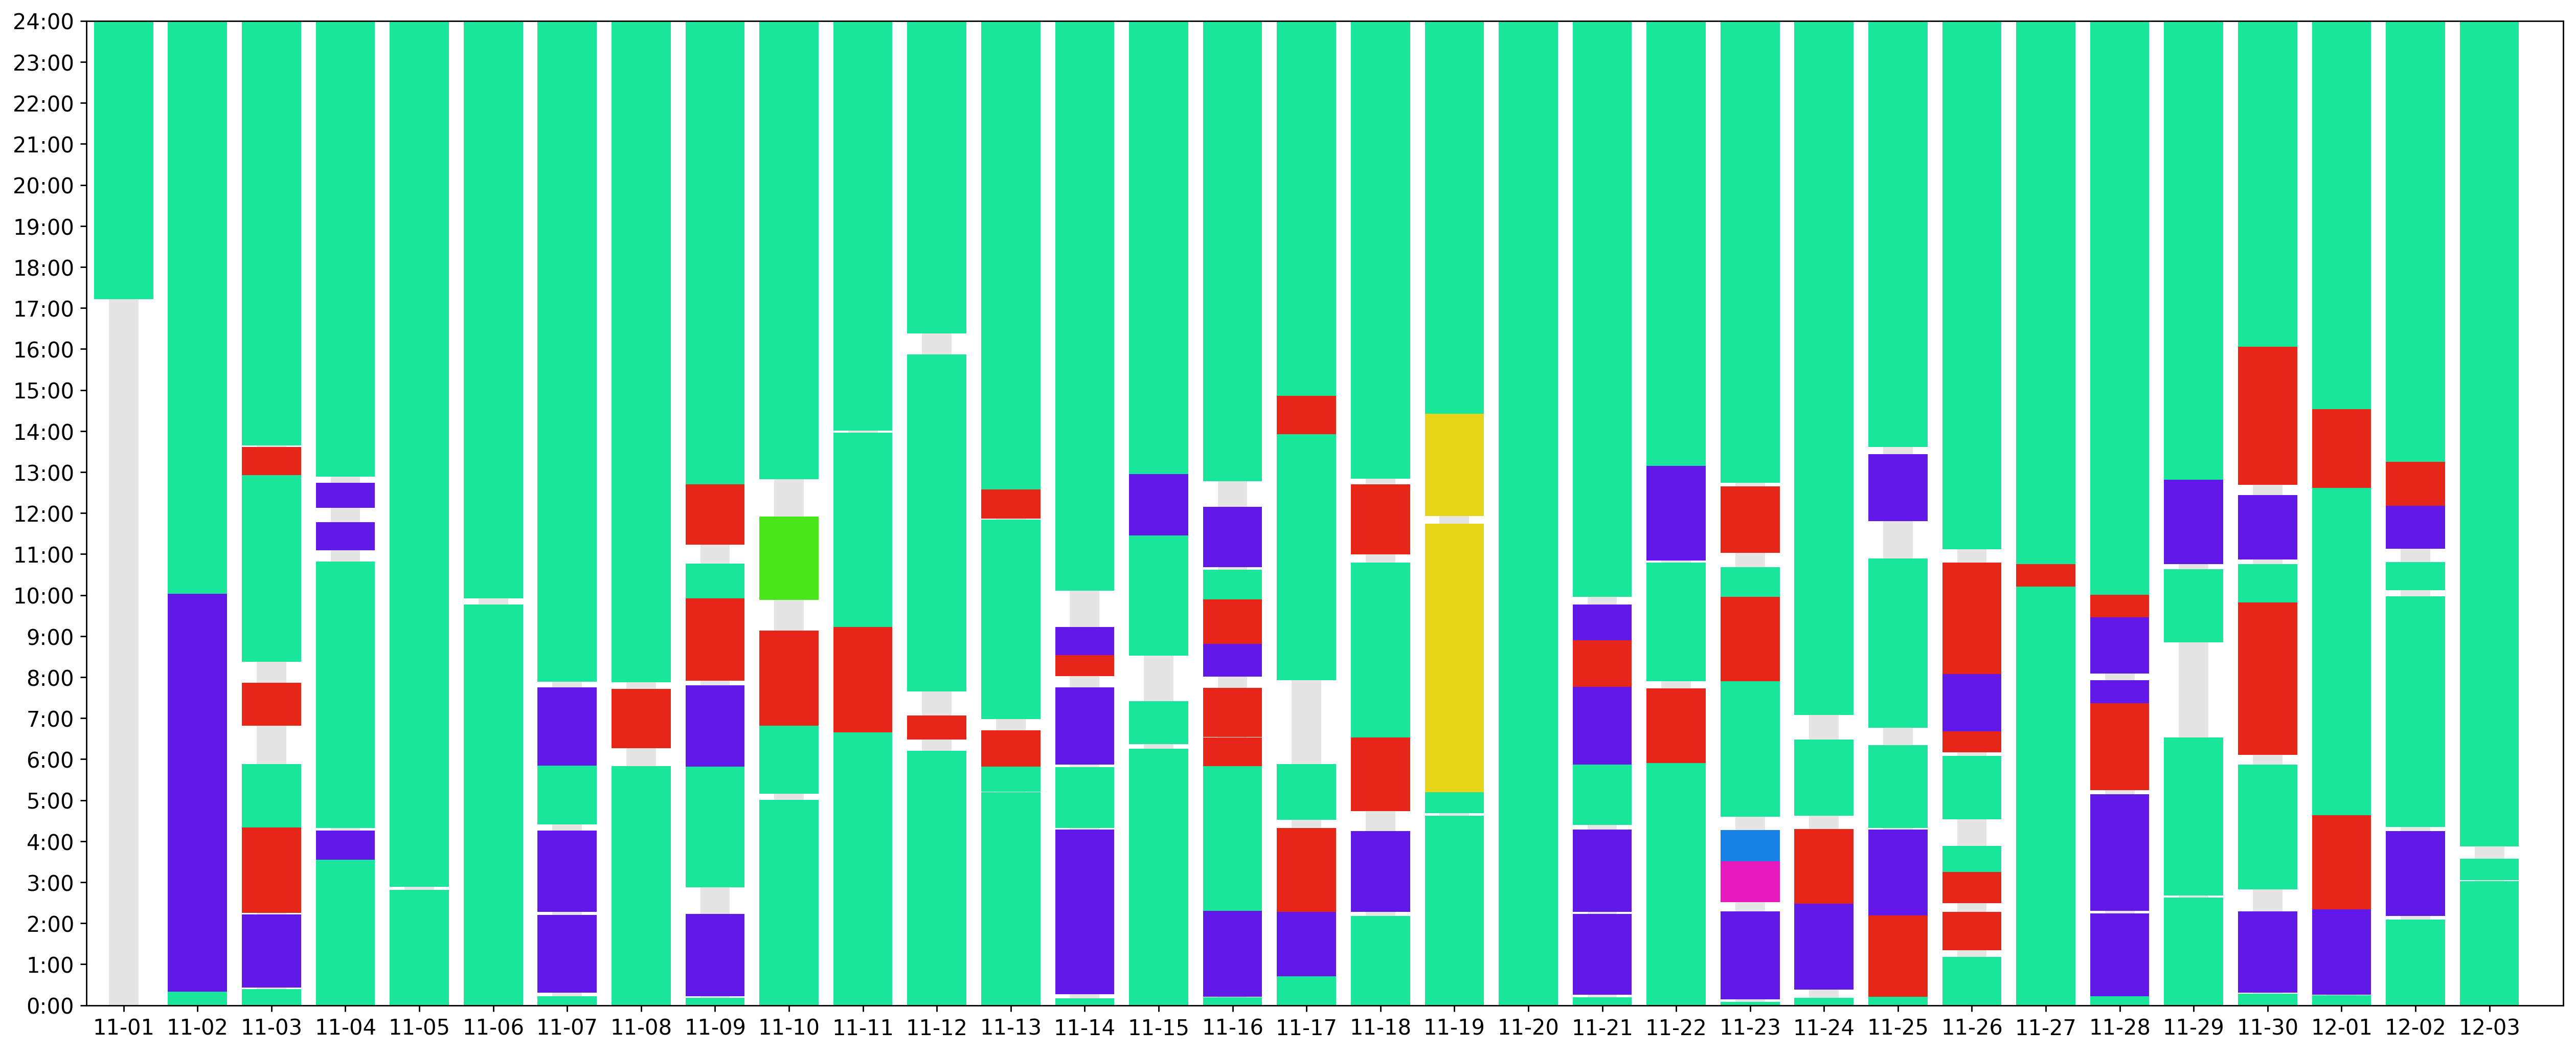

In [97]:
#Plot the activity of the user, different color represent different location
# uid = "4"
# stay['group'] = stay['LONCOL'].astype(str)+','+stay['LATCOL'].astype(str)
# tbd.plot_activity(stay[stay['user_id']==uid])
tbd.plot_activity(stay,figsize = (25, 10))

<AxesSubplot: >

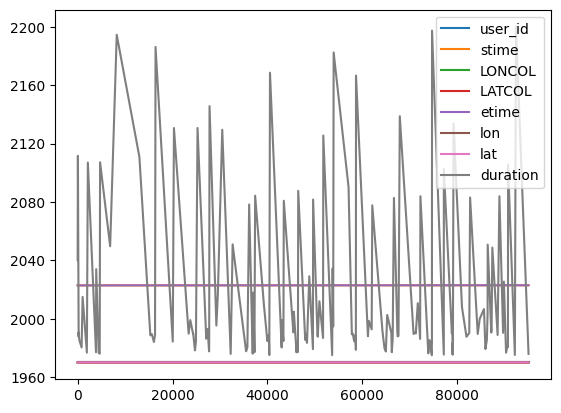

In [98]:
stay.plot()